In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve
# 读取训练数据集train
df= pd.read_csv("D:\\Machine Learning\\corrpration homework\\train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### 1.Feature importance可视化
### 2.correlation矩阵可视化

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

          Feature  Importance
13            ram    0.470962
0   battery_power    0.074796
11      px_height    0.058538
12       px_width    0.056722
8       mobile_wt    0.041434
6      int_memory    0.037928
16      talk_time    0.032441
10             pc    0.030745
2     clock_speed    0.029058
14           sc_h    0.028447
15           sc_w    0.028134
4              fc    0.024514
7           m_dep    0.024134
9         n_cores    0.023978
17        three_g    0.006841
1            blue    0.006595
3        dual_sim    0.006430
1

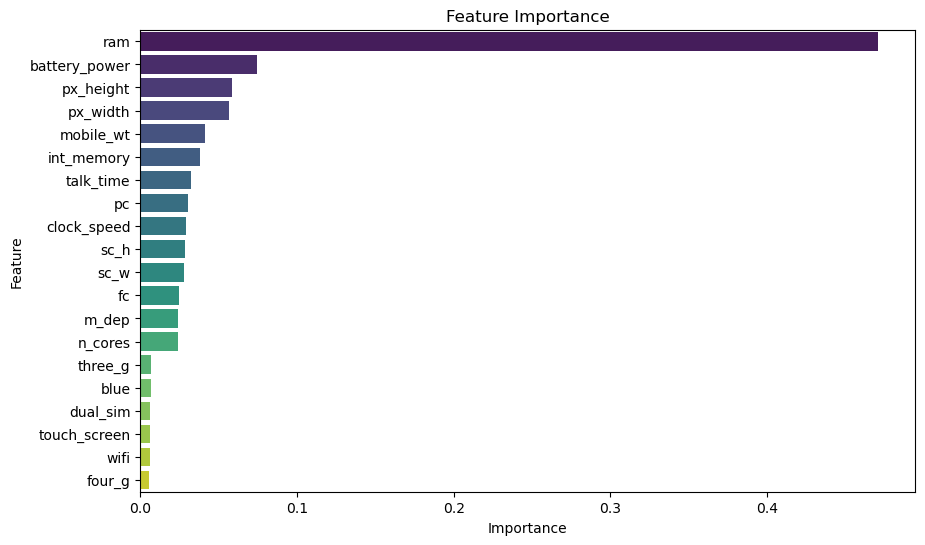

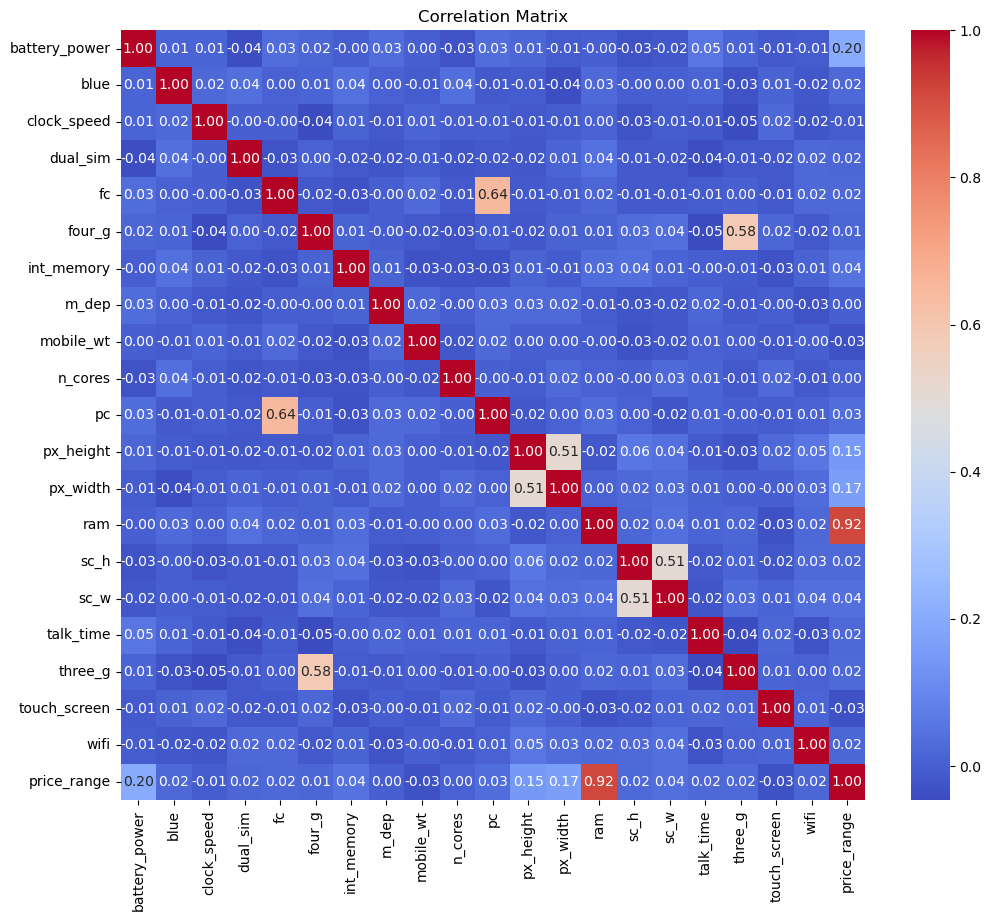

In [2]:
# 划分特征和标签
X = df.drop('price_range', axis=1)
y = df['price_range']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测
y_pred = rf_classifier.predict(X_test)

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

# 输出特征重要性
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(feature_importance)
# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# 计算特征间的相关性矩阵
correlation_matrix = df.corr()

# 可视化相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 3.学习曲线可视化

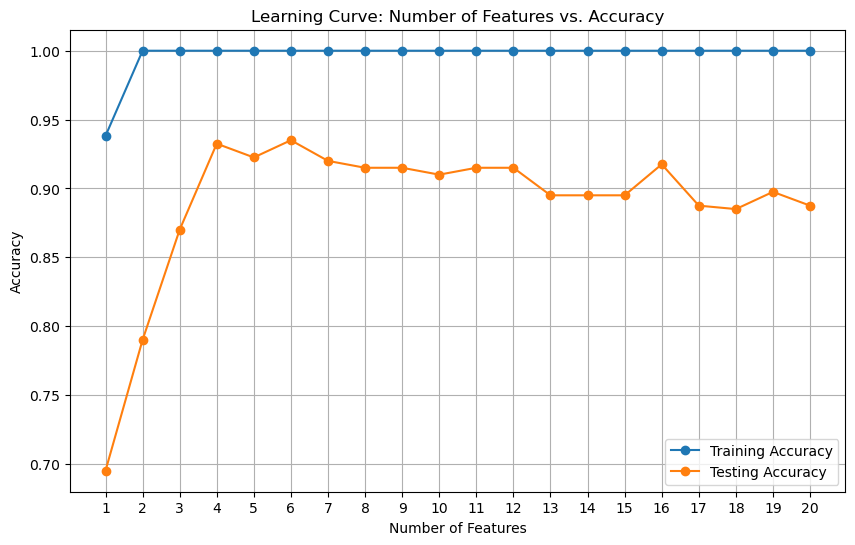

In [3]:
# 定义不同数量的特征
num_features = range(1, len(X.columns) + 1)

# 初始化模型
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 初始化空列表存储训练集和测试集的准确率
train_scores = []
test_scores = []

# 遍历不同数量的特征
for num_feature in num_features:
    # 选择前 num_feature 个特征
    selected_features = feature_importance['Feature'].head(num_feature).tolist()
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # 训练模型
    rf_classifier.fit(X_train_subset, y_train)

    # 预测并计算准确率
    y_train_pred = rf_classifier.predict(X_train_subset)
    y_test_pred = rf_classifier.predict(X_test_subset)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # 将准确率添加到列表中
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# 绘制学习曲线
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_scores, marker='o', label='Training Accuracy')
plt.plot(num_features, test_scores, marker='o', label='Testing Accuracy')
plt.title('Learning Curve: Number of Features vs. Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(num_features), max(num_features)+1, 1))
plt.legend()
plt.grid(True)
plt.show()

### 4.特征选择：根据学习曲线，决定选择Importance前四个变量{ram，battery_power，px_height，px_width}

In [4]:
# 划分特征和标签
X = df[['ram','battery_power','px_height','px_width']]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测
y_pred = rf_classifier.predict(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率：{accuracy:.2f}')
# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

模型准确率：0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.89      0.98      0.93        91
           2       0.89      0.88      0.89        92
           3       0.95      0.92      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### 5.参数调整

In [5]:
# 设置参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2,5, 10]
}


# 使用网格搜索进行参数调整
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# 输出最佳参数
print("最佳参数:", grid_search.best_params_)

最佳参数: {'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=2, random_state=42)

# 训练模型
rf_classifier.fit(X_train, y_train)

# 预测
y_pred = rf_classifier.predict(X_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'模型准确率：{accuracy:.2f}')
# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred))

模型准确率：0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.90      0.95      0.92        91
           2       0.87      0.89      0.88        92
           3       0.96      0.91      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



这个参数调整完准确率也没变，感觉还是特征选择更有效。。。

### 6.应用于测试集test

In [7]:
test_data=pd.read_csv("D:\\Machine Learning\\corrpration homework\\test.csv")
X_test=test_data[['ram','battery_power','px_height','px_width']]
y_test_pred=rf_classifier.predict(X_test)
test_data['predicted_label'] = y_test_pred
test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_label
0,1,1042,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


In [8]:
# 统计每个分类值的数量
predicted_label_counts = test_data['predicted_label'].value_counts()

# 将结果转换为 DataFrame，并添加列名
result_table = pd.DataFrame(predicted_label_counts.items(), columns=['Predicted Label', 'Count'])

# 输出结果表格
result_table

,Predicted Label,Count
0,2,261
1,3,254
2,0,253
3,1,232
